In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

**Parameter of each feature maps:** 
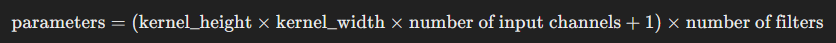

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color

    #? This is the first convolution
    #? ((3 x 3) x 3 + 1) x 16 = (kernel_shape x total_channels + bias) x total_filter = 448
    #? Output shape: (298, 298, 16) because there is no padding meaning leaving 1 pixel/layer off from each size of width and height.  
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)), 
    # Divided feature map by 2 
    tf.keras.layers.MaxPooling2D(2, 2), #? (149, 149, 16) 

    #? The second convolution 
    #? (3x3x16+1)*32 = 4640 
    # 32 is the number kernels to extract 32 different features
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), # (147, 147, 32) again 298/2 = 149-3+1 = 147    
    tf.keras.layers.MaxPooling2D(2,2), # (73, 73, 32)

    # The third convolution
    #? (3x3x32+1)x64 = 18496
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # (73, 73, 64) 
    tf.keras.layers.MaxPooling2D(2,2), # (36, 36, 64)

    # The fourth convolution
    #? (3x3x64+1)x64 = 36928 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # (34, 34, 64)
    tf.keras.layers.MaxPooling2D(2,2), #? (17, 17, 64)

    # The fifth convolution
    #? (3x3x64+1)*128 = 73856
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), # (15, 15, 128)
    tf.keras.layers.MaxPooling2D(2,2), # total image: (7, 7, 128)

    # Flatten the results to feed into a DNN
    #? flatten to 1 vector shape (1, 6272) 
    tf.keras.layers.Flatten(), 

    # 512 neuron hidden layer
    #? parameters = (6272 + 1) x 512 = (input_node + 1) x output_node = 3_211_776  
    tf.keras.layers.Dense(512, activation='relu'),

    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    #? parameters = (512 + 1) x 1 = 513 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary() # manual_cal: 3346209

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,346,657 (12.77 MB)

 Trainable params: 3,346,657 (12.77 MB)

 Non-trainable params: 0 (0.00 B)